In [1]:
#Analisis de Datos sobre Mundiales de Futbol

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
#Lectura de archivos

In [4]:
datos_mundiales= pd.read_excel('world_cups.xlsx')

In [5]:
datos_matches=pd.read_excel('world_cups.xlsx', sheet_name='matches')

In [6]:
datos_players=pd.read_excel('world_cups.xlsx', sheet_name='players')

In [7]:
datos_mundiales.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [8]:
datos_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [9]:
datos_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [10]:
#¿De cuantos mundiales tenemos información?

In [11]:
datos_mundiales.shape

(20, 10)

In [12]:
#Tenemos información de 20 mundiales

In [13]:
#¿Cuales son estos mundiales?

In [14]:
datos_mundiales['Year']=datos_mundiales['Year'].astype('str')

In [15]:
datos_mundiales['Name']= datos_mundiales['Country']+ " " + datos_mundiales['Year']

In [16]:
datos_mundiales['Name']

0          Uruguay 1930
1            Italy 1934
2           France 1938
3           Brazil 1950
4      Switzerland 1954
5           Sweden 1958
6            Chile 1962
7          England 1966
8           Mexico 1970
9          Germany 1974
10       Argentina 1978
11           Spain 1982
12          Mexico 1986
13           Italy 1990
14             USA 1994
15          France 1998
16     Korea/Japan 2002
17         Germany 2006
18    South Africa 2010
19          Brazil 2014
Name: Name, dtype: object

In [17]:
#Paises que ganaron en local

In [18]:
datos_ganadores_local= datos_mundiales.loc[datos_mundiales['Country']==datos_mundiales['Winner']]

In [19]:
datos_ganadores_local

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Name
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,Uruguay 1930
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,Italy 1934
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135,England 1966
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791,Argentina 1978
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100,France 1998


In [20]:
#Partidos del mundial con más goles

In [21]:
#utilizo los otros datos

In [22]:
datos_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [23]:
datos_matches['Total Goals']=datos_matches['Home Team Goals'] + datos_matches['Away Team Goals']

In [24]:
datos_matches.sort_values(by='Total Goals', ascending=False).head(20)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
94,1954,26 Jun 1954 - 17:00,Quarter-finals,La Pontaise,Lausanne,Austria,7,5,Switzerland,,...,5,4,FAULTLESS Charlie (SCO),ASENSI Manuel (ESP),SCHMETZER Emil (FRG),212,1237,AUT,SUI,12
312,1982,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10,1,El Salvador,,...,3,0,AL DOY Ebrahim (BHR),CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293,896,HUN,SLV,11
87,1954,20 Jun 1954 - 16:50,Group 2,St. Jakob,Basel,Hungary,8,3,Germany FR,,...,3,1,LING William (ENG),SCHICKER Werner (SUI),GRIFFITHS Benjamin (WAL),211,1277,HUN,FRG,11
40,1938,05 Jun 1938 - 17:30,First round,Stade de la Meinau,Strasbourg,Brazil,6,5,Poland,Brazil win after extra time,...,0,0,EKLIND Ivan (SWE),POISSANT Louis (FRA),KISSENBERGER Ernest (FRA),206,1150,BRA,POL,11
105,1958,08 Jun 1958 - 19:00,Group 2,Idrottsparken,NorrkÔøΩPing,France,7,3,Paraguay,,...,2,2,GARDEAZABAL Juan (ESP),GRIFFITHS Benjamin (WAL),BROZZI Juan (ARG),220,1386,FRA,PAR,10
10,1930,19 Jul 1930 - 15:00,Group 1,Estadio Centenario,Montevideo,Argentina,6,3,Mexico,,...,3,1,SAUCEDO Ulises (BOL),ALONSO Gualberto (URU),RADULESCU Constantin (ROU),201,1086,ARG,MEX,9
91,1954,23 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Germany FR,7,2,Turkey,,...,3,1,VINCENTI Raymond (FRA),FAULTLESS Charlie (SCO),DOERFLINGER Ernst (SUI),211,1284,FRG,TUR,9
243,1974,18 Jun 1974 - 19:30,Group 2,Parkstadion,Gelsenkirchen,Yugoslavia,9,0,Zaire,,...,6,0,DELGADO Omar (COL),LLOBREGAT Vicente (VEN),BARRETO RUIZ Ramon (URU),262,2186,YUG,ZAI,9
80,1954,17 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Hungary,9,0,Korea Republic,,...,4,0,VINCENTI Raymond (FRA),VON GUNTER Albert (SUI),STEINER Carl (AUT),211,1294,HUN,KOR,9
134,1958,28 Jun 1958 - 17:00,Match for third place,Nya Ullevi,Gothenburg,France,6,3,Germany FR,,...,3,1,BROZZI Juan (ARG),ELLIS Arthur (ENG),LUNDELL Bengt (SWE),3483,1382,FRA,FRG,9


In [25]:
#Partidos con más goles recientes(a partir del 2000)

In [26]:
datos_matches.sort_values(by='Total Goals', ascending=False)\
.loc[datos_matches['Year']>2000]\
.head(20)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,...,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,8
826,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,...,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,8
583,2002,01 Jun 2002 - 20:30,Group E,Sapporo Dome,Sapporo,Germany,8,0,Saudi Arabia,,...,4,0,AQUINO Ubaldo (PAR),GIACOMUZZI Miguel (PAR),RAGOONATH Michael (TRI),43950100,43950004,GER,KSA,8
737,2010,21 Jun 2010 - 13:30,Group G,Cape Town Stadium,Cape Town,Portugal,7,0,Korea DPR,,...,1,0,POZO Pablo (CHI),BASUALTO Patricio (CHI),MONDRIA Francisco (CHI),249722,300061487,POR,PRK,7
796,2014,20 Jun 2014 - 16:00,Group E,Arena Fonte Nova,Salvador,Switzerland,2,5,France,,...,0,3,BjÔøΩrn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255931,300186514,SUI,FRA,7
620,2002,13 Jun 2002 - 15:30,Group C,Suwon World Cup Stadium,Suwon,Costa Rica,2,5,Brazil,,...,1,3,EL GHANDOUR Gamal (EGY),FARAG Wagih (EGY),BEREUTER Egon (AUT),43950100,43950041,CRC,BRA,7
774,2014,13 Jun 2014 - 16:00,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,,...,1,1,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255931,300186510,ESP,NED,6
802,2014,22 Jun 2014 - 16:00,Group H,Estadio Beira-Rio,Porto Alegre,Korea Republic,2,4,Algeria,,...,0,3,ROLDAN Wilmar (COL),DIAZ Eduardo (COL),LESCANO Christian (ECU),255931,300186495,KOR,ALG,6
613,2002,11 June 2002 - 15:30,Group A,Suwon World Cup Stadium,Suwon,Senegal,3,3,Uruguay,,...,3,0,WEGEREEF Jan (NED),POOL Jaap (NED),SZEKELY Ferenc (HUN),43950100,43950034,SEN,URU,6
644,2006,09 Jun 2006 - 18:00,Group A,"FIFA World Cup Stadium, Munich",Munich,Germany,4,2,Costa Rica,,...,2,1,ELIZONDO Horacio (ARG),GARCIA Dario (ARG),OTERO Rodolfo (ARG),97410100,97410001,GER,CRC,6


In [27]:
#promedio de goles por partido

In [29]:
datos_mundiales['AvgGoals']=datos_mundiales['GoalsScored'] / datos_mundiales['MatchesPlayed']

In [30]:
datos_mundiales.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Name,AvgGoals
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,Uruguay 1930,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,Italy 1934,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,France 1938,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,Brazil 1950,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,Switzerland 1954,5.384615


In [31]:
#Gráfico de barras con la cantidad de goles por mundial

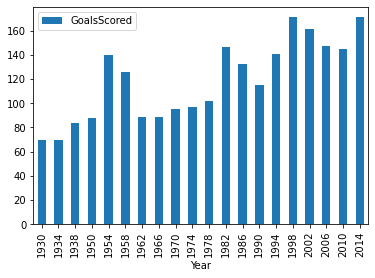

In [33]:
datos_mundiales.plot(kind= 'bar', x='Year', y='GoalsScored')